# The Aim of the Project is to study the Performance of Convolutional Neural Networks, Neural Network and Logistic Regression (with PCA) for Image Classification

## 1. Logistic regression and PCA 

MedMNIST is a collection of healthcase based datasets that are pre-processed to match to format of the original MNIST dataset. In this section, I've performed logistic regression and dimension reduction using PCA on the **PneumoniaMNIST** dataset from the MedMNIST. The task for this dataset is to detect whether a chest X-ray shows signs of Pneumonia or not and is therefore a binary classification task.


###  Data download 

The code cell belows provides the code to download the dataset as a compressed numpy file directly from the [MedMNIST website](https://doi.org/10.5281/zenodo.6496656
).



In [2]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import urllib.request
import os
from sklearn import preprocessing as p
  

# Download the dataset to the local folder
urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/pneumoniamnist.npz?download=1', 'pneumoniamnist.npz')

# Load the compressed numpy array file
dataset = np.load('./pneumoniamnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)

train_images (4708, 28, 28) uint8
val_images (524, 28, 28) uint8
test_images (624, 28, 28) uint8
train_labels (4708, 1) uint8
val_labels (524, 1) uint8
test_labels (624, 1) uint8


**1.1a** After downloading the data, I've merged the validation set into the training set and reshaped the images so that each is a 1D array. Then I've scaled the pixel values so they are in the range [0,1].

In [192]:

#getting the features and the labels as two different arrays for training, validation and test sets

train_features = np.array(dataset['train_images'])
train_labels = np.array(dataset['train_labels'])
test_features = np.array(dataset['test_images'])
test_labels = np.array(dataset['test_labels'])
val_features = np.array(dataset['val_images'])
val_labels = np.array(dataset['val_labels'])

train_features = np.vstack((train_features,val_features))
train_labels = np.vstack((train_labels,val_labels))

In [193]:
#merge validation set
from sklearn import preprocessing as p

#reshapping all the images into 1d arrays

train_features_1d = np.array([ i.reshape(-1) for i in train_features])
test_features_1d = np.array([ i.reshape(-1) for i in test_features])

min_max_scaler = p.MinMaxScaler()

scaled_train_features = min_max_scaler.fit_transform(train_features_1d)
scaled_test_features = min_max_scaler.fit_transform(test_features_1d)

#temp=[]
#for i in train_features:
    #temp.append(i.reshape(-1))
#temp = train_features.reshape(-1)

print(train_features.shape)
print(train_features_1d.shape)
print(train_features_1d[0].shape)
print(min_max_scaler.fit_transform(train_features_1d))
#print(minmax_scaler.fit_transform(train_features))

(5232, 28, 28)
(5232, 784)
(784,)
[[0.37860082 0.45378151 0.48347107 ... 0.71186441 0.63636364 0.59401709]
 [0.47325103 0.49579832 0.48347107 ... 0.77542373 0.72727273 0.72222222]
 [0.61316872 0.61344538 0.60743802 ... 0.79661017 0.69834711 0.67094017]
 ...
 [0.51851852 0.6092437  0.63636364 ... 0.76694915 0.7231405  0.71794872]
 [0.01234568 0.         0.01239669 ... 0.66949153 0.66942149 0.64957265]
 [0.26337449 0.28991597 0.33057851 ... 0.8559322  0.80991736 0.79487179]]


In [207]:
#creating a copy for unreduced features

scaled_unreduced_train_features = scaled_train_features
scaled_unreduced_test_features =  scaled_test_features
#print(scaled_unreduced_train_features)

### 1.2: Dimensional reduction and training 

**1.2a** Using the Scikit-learn PCA class, I've transformed the training and test data into **seven** different sets of reduced dimensions, i.e I've created 7 alternate datsets with ($k_1, k_2, ..., k_7$) number of features. I've Kept a copy of the unreduced data so that in total I have **eight** datasets.


As per the rule we must fit the tranformation based on the training data and use that to transform the test data.

In [247]:
# A function to k-different datasets for k-different featues

from sklearn.decomposition import PCA
def gen_datasets(n_features):
    k = [None]*len(n_features)
    k_test = [None]*len(n_features)
    principal = [None]*len(n_features)
    for i in range(len(n_features)):
        principal[i] = PCA(n_components = n_features[i])
        principal[i].fit(scaled_train_features)
        k[i] = principal[i].transform(scaled_train_features)
        k_test[i] = principal[i].transform(scaled_test_features)
    return k, k_test, principal

In [248]:
#getting k-different datasets for k-different features, first one having all the features

n_features = [784,25,30,40,45,50,75,100]
k,k_test,principal = gen_datasets(n_features)


**1.2b** Training **eight** logistic regression classifiers (LRC): one on the original features (unreduced), and seven on PCA features with seven different dimensions in 1.2a, i.e., LRC on $k_1$ PCA features; LRC on $k_2$ PCA features; ..., LRC on $k_7$ PCA features and LRC on the unreduced data.


In [231]:
from sklearn.linear_model import LogisticRegression


# Creating 8 different logistic regression models for all the datasets created above

logisticRegr = [None]*8
for i in range(0,8):
    if(i==0):
        logisticRegr[i] = LogisticRegression(penalty='l2',solver='sag')
        logisticRegr[i].fit(scaled_unreduced_train_features,train_labels)
    
    else:
        
        logisticRegr[i] = LogisticRegression(penalty='l2',solver='sag')
        logisticRegr[i].fit(k[i],train_labels)
 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

### 1.3: Model evaluation

**1.3b** For each of the trained classifiers in 1.2b, I've calculated the classification accuracy on the training data and the test data. I've also extracted the total explained variance by summing the `PCA.explained_variance_ratio_` for each of the PCA transformations. Finally, I've **Plotted** the training accuracy and test accuracy against the total explained variance at each $k_n$. This also includes the dataset with original unreduced features.

In [232]:
# Getting the testing and training predictions using the 8-different models created above

pred_test = [None]*8
pred_train = [None]*8
for i in range(0,8):
    if(i==0):
        pred_test[i] = logisticRegr[i].predict(scaled_unreduced_test_features)
        pred_train[i] = logisticRegr[i].predict(scaled_unreduced_train_features)
    else:
        pred_test[i] = logisticRegr[i].predict(k_test[i])
        pred_train[i] = logisticRegr[i].predict(k[i])

In [235]:
import sklearn.metrics

#Computing the training and test accuracies for the corresponding predictions made above

acc_test = [None]*8
acc_train = [None]*8
for i in range(0,8):
    acc_test[i] = sklearn.metrics.accuracy_score(test_labels,pred_test[i])
    acc_train[i] = sklearn.metrics.accuracy_score(train_labels,pred_train[i])
   

In [262]:
tot_var = [None]*8
#Extracting the total explained variance ratio for each of the PCA transformations

for i in range(0,8):
    tot_var[i] = round(sum(principal[i].explained_variance_ratio_),3)

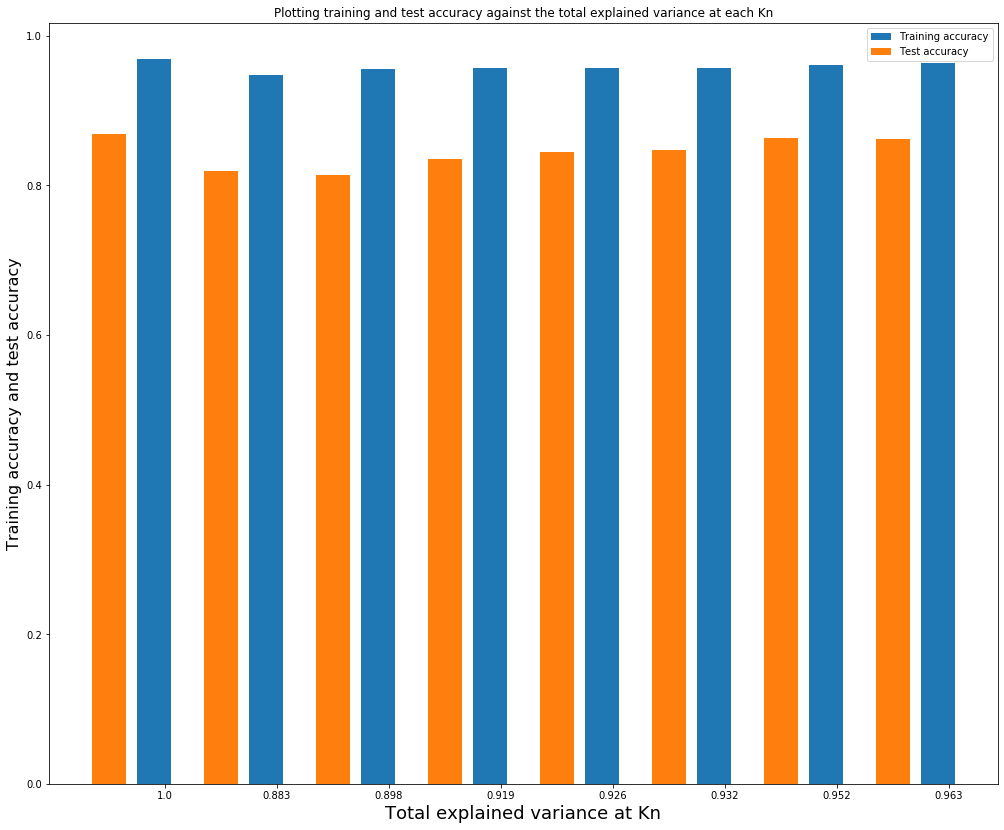

In [301]:
# Plotting the accuracies of the different models against their respective total explained variance at each Kn

X_axis = np.arange(len(tot_var))
plt.rcParams["figure.figsize"] = [17,14]
plt.bar(X_axis - 0.1, acc_train, 0.3, label = 'Training accuracy')
plt.bar(X_axis - 0.5, acc_test, 0.3, label = 'Test accuracy')


plt.xticks(X_axis,tot_var)
plt.xlabel("Total explained variance at Kn",fontsize=18)
plt.ylabel("Training accuracy and test accuracy",fontsize=16)
plt.title('Plotting training and test accuracy against the total explained variance at each Kn')
plt.legend()



plt.show()

**1.3b** Interesting Observations:

1. From the figure above, it is clear that the model gives a good performance by not including all the features

2. The Training accuracy is more than the testing accracy because the the models are trained on the respective train sets


## 2. Convolutional neural networks for image recognition

Fashion-MNIST is a dataset of Zalando's article images. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes: 0=T-shirt/top; 1=Trouser; 2=Pullover; 3=Dress; 4=Coat; 5=Sandal; 6=Shirt; 7=Sneaker; 8=Bag; 9=Ankle boot.

It is available online at https://github.com/zalandoresearch/fashion-mnist but here I will use the version built into PyTorch as part of the TorchVision library [see here for  documentation](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST).

In this section, I've used PyTorch to train various forms of neural network models to classify these images.

### 2.1: Data download and inspection

**2.1a** Using the PyTorch Torchvision API to load both the train and test parts of the Fashion-MNIST dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [2]:
import time as time

In [3]:
torch.set_printoptions(linewidth=120)

In [5]:
batchSize=20

#Load the training data
# let's also normalize the data for faster convergence


mean = 0.2859;  std = 0.3530 #initializing the mean and std of the MNIST
# import data
train_set = torchvision.datasets.FashionMNIST(root="./", download=True,
                                              transform=transforms.Compose([transforms.ToTensor(),
                                                                            transforms.Normalize(mean, std)
                                                                           ]))
#data_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)



#Load the test data
test_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=False,
                                              transform=transforms.Compose([transforms.ToTensor()]))


print('Training set size:', len(train_set))
print('Test set size:',len(test_set))

Training set size: 60000
Test set size: 10000


**2.1b** Using the `torch.utils.data.random_split` function to split the 60,000 training set into 2 subsets: the first part will be used for training, the second part will be used for validation. Also created a DataLoader for each of the train, validation, and test splits.

In [6]:
train_set1, val_set = torch.utils.data.random_split(train_set,[45000,15000],generator=torch.Generator().manual_seed(1765677))


#Creating DataLoader for training set
train_loader = torch.utils.data.DataLoader(train_set1, batch_size=100,shuffle=True)
#Creating DataLoader for validation set
val_loader = torch.utils.data.DataLoader(val_set, batch_size=15000,shuffle=True)
#Creating DataLoader for test set
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10000,shuffle=True)
print("Training set size: ",len(train_set1))
print("Validation set size: ",len(val_set))

Training set size:  45000
Validation set size:  15000


**2.1c** Displaying a sample image

In [307]:
names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
all_classes = [0,1,2,3,4,5,6,7,8,9]

9


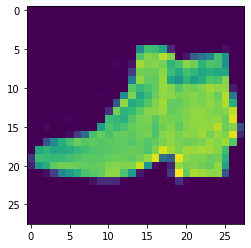

In [260]:
image,lbl = train_set1[8]

plt.imshow(image.squeeze())
print(lbl)

### 2.2: Network training

In this section I will be training a set of neural network models to classify the Fashion-MNIST data set. The number of convolutional (Conv) layers and the number of fully connected (FC) layers has been specified below. I have also designed other aspects of the network. For example, other types of operation (e.g. padding), layers (e.g. pooling, or preprocessing (e.g. augmentation).

When training each model I have kept track of the following values:
1. Training accuracy
2. Validation accuracy
3. Test accuracy

Note: the accuracy is the number of correct classifications out of that portion of the dataset.

**2.2a** Training a neural network composed of **2 fully connected layers**. Training the model on the training set, and using the validation set to choose the best design among **at least three different** choices, and testing the chosen model on the test set.



In [10]:
@torch.no_grad()
def total_match(preds, labels):
    """function that returns the accuracy of our architecture"""
    
    return preds.argmax(dim=1).eq(labels).sum().item()

In [11]:
def CNN_training(learning_rate,train_set,data_loader):
    optimizer = optim.Adam(lr=learning_rate,params=cnn_model.parameters())
    
    for epoch in range(5):
        start_time = time.time()
        total_correct = 0
        total_loss = 0
        for batch in data_loader:
            imgs, lbls = batch
            preds = cnn_model(imgs)
            loss = F.cross_entropy(preds, lbls)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            total_correct += total_match(preds, lbls)
            accuracy = total_correct/len(train_set)
        end_time = time.time() - start_time
        print("Epoch no. ",epoch+1, "|accuracy: ",round(accuracy,3),"%", "|total_loss:",total_loss, "|epochduration: ",round(end_time,2),"sec")

In [315]:

class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.fc1 = nn.Linear(in_features=784, out_features=20)
    
        self.fc2 = nn.Linear(in_features=20, out_features=10)
       
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        t = t.view(t.shape[0],-1)
        t = F.relu(self.fc1(t))
        t = F.log_softmax(self.fc2(t),dim=1)
        return t        

In [316]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.806 % |total_loss: 238.61478631198406 |epochduration:  23.6 sec
Epoch no.  2 |accuracy:  0.842 % |total_loss: 194.66426573693752 |epochduration:  23.14 sec
Epoch no.  3 |accuracy:  0.85 % |total_loss: 183.5469655841589 |epochduration:  23.13 sec
Epoch no.  4 |accuracy:  0.858 % |total_loss: 177.401079967618 |epochduration:  23.64 sec
Epoch no.  5 |accuracy:  0.859 % |total_loss: 173.74226860702038 |epochduration:  23.23 sec


In [317]:
imgs,lbls = next(iter(val_loader))
val_preds = cnn_model(imgs)
tot = total_match(val_preds,lbls)
acc = round((tot/15000)*100,3)
print("The validation accuracy for this architecture is : ",acc,"%")

The validation accuracy for this architecture is :  84.453 %


In [318]:
temp_model11 = cnn_model

In [325]:

class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        
        self.fc2 = nn.Linear(in_features=256, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        t = t.view(t.shape[0],-1)
        t = F.relu(self.fc1(t))
        t = F.log_softmax(self.fc2(t),dim=1)
        return t        

In [326]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.814 % |total_loss: 240.9465250968933 |epochduration:  40.45 sec
Epoch no.  2 |accuracy:  0.849 % |total_loss: 197.35249523818493 |epochduration:  32.83 sec
Epoch no.  3 |accuracy:  0.855 % |total_loss: 183.99944226443768 |epochduration:  33.85 sec
Epoch no.  4 |accuracy:  0.863 % |total_loss: 173.14042419195175 |epochduration:  38.15 sec
Epoch no.  5 |accuracy:  0.864 % |total_loss: 171.48070539534092 |epochduration:  27.55 sec


In [327]:
imgs,lbls = next(iter(val_loader))
val_preds = cnn_model(imgs)
tot = total_match(val_preds,lbls)
acc = round((tot/15000)*100,3)
print("The validation accuracy for this architecture is : ",acc,"%")

The validation accuracy for this architecture is :  85.327 %


In [328]:
temp_model12 = cnn_model

In [329]:
# Write your code here.

class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.fc1 = nn.Linear(in_features=784, out_features=512)
        
        self.fc2 = nn.Linear(in_features=512, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        t = t.view(t.shape[0],-1)
        t = F.relu(self.fc1(t))
        t = F.log_softmax(self.fc2(t),dim=1)
        return t        

In [330]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.807 % |total_loss: 271.57324519753456 |epochduration:  32.39 sec
Epoch no.  2 |accuracy:  0.842 % |total_loss: 205.95352022349834 |epochduration:  36.52 sec
Epoch no.  3 |accuracy:  0.859 % |total_loss: 178.24395588040352 |epochduration:  36.27 sec
Epoch no.  4 |accuracy:  0.857 % |total_loss: 188.6062457561493 |epochduration:  32.27 sec
Epoch no.  5 |accuracy:  0.863 % |total_loss: 178.59960633516312 |epochduration:  38.28 sec


In [331]:
imgs,lbls = next(iter(val_loader))
val_preds = cnn_model(imgs)
tot = total_match(val_preds,lbls)
acc = round((tot/15000)*100,3)
print("The validation accuracy for this architecture is : ",acc,"%")

The validation accuracy for this architecture is :  86.373 %


In [332]:
temp_model13 = cnn_model

### The chosen model has a validation accuracy of 86.373 %

In [333]:
final_model1 = temp_model13

In [334]:
ims,lbs = next(iter(test_loader))
test_preds = final_model1(ims)
tot = total_match(test_preds,lbs)
acc = round((tot/10000)*100,3)
print("The test accuracy of the chosen model is ",acc,"%")

The test accuracy of the chosen model is  68.84 %


### The chosen model has a test accuracy of 68.84 %

In [335]:
tot =0
for data in train_loader:
    img,lbl = data
    train_preds = final_model1(img)
    tot += total_match(train_preds,lbl)
acc = round((tot/len(train_set1))*100,3)
print("The train accuracy of the chosen model is ",acc,"%")

The train accuracy of the chosen model is  87.647 %


### The chosen model has a training accuracy of 87.647 %

**2.2b** Training a neural network composed of **2 convolutional layers and 2 fully connected layers**. Training the model on the training set, and using the validation set to choose the best design among **at least three different** choices, and testing the chosen model on the test set.

In [22]:
class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.batchN0 = nn.BatchNorm2d(num_features=1)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=4)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=12, kernel_size=(5,5))
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.batchN2 = nn.BatchNorm1d(num_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.batchN0(t)
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        
        # flatten
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN2(t)
        t = self.fc2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return t        

In [23]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.819 % |total_loss: 220.76692217588425 |epochduration:  37.17 sec
Epoch no.  2 |accuracy:  0.861 % |total_loss: 165.8428691625595 |epochduration:  37.33 sec
Epoch no.  3 |accuracy:  0.874 % |total_loss: 152.1962285786867 |epochduration:  37.46 sec
Epoch no.  4 |accuracy:  0.881 % |total_loss: 142.90625350177288 |epochduration:  38.22 sec
Epoch no.  5 |accuracy:  0.883 % |total_loss: 137.6844441741705 |epochduration:  37.75 sec


In [24]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = tot/15000
acc = round(acc,3)*100
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  87.9  %


In [40]:
temp_model21 = cnn_model

In [28]:
class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=8)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=12, kernel_size=(5,5))
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.batchN2 = nn.BatchNorm1d(num_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        
        # flatten
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN2(t)
        t = self.fc2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return t        

In [29]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.823 % |total_loss: 216.11097733676434 |epochduration:  41.51 sec
Epoch no.  2 |accuracy:  0.871 % |total_loss: 157.210000872612 |epochduration:  39.31 sec
Epoch no.  3 |accuracy:  0.882 % |total_loss: 143.14215572178364 |epochduration:  40.19 sec
Epoch no.  4 |accuracy:  0.893 % |total_loss: 131.8436310738325 |epochduration:  39.48 sec
Epoch no.  5 |accuracy:  0.898 % |total_loss: 126.4044260084629 |epochduration:  39.52 sec


In [30]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = tot/15000
acc = round(acc,3)*100
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  88.7  %


In [41]:
temp_model22 = cnn_model

In [338]:

class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=20)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=24, kernel_size=(5,5))
        self.fc1 = nn.Linear(in_features=24*4*4, out_features=100)
        self.batchN2 = nn.BatchNorm1d(num_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=60)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=2, stride=2)
        t = F.relu(t)
        
        # flatten
        t = t.reshape(-1, 24*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN2(t)
        t = self.fc2(t)
        t = F.relu(t)
        
        # output
        t = F.log_softmax(t,dim=1)
        
        return t        

In [339]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.83 % |total_loss: 215.7347368001938 |epochduration:  67.35 sec
Epoch no.  2 |accuracy:  0.879 % |total_loss: 151.02298820018768 |epochduration:  65.83 sec
Epoch no.  3 |accuracy:  0.893 % |total_loss: 131.57582406699657 |epochduration:  66.51 sec
Epoch no.  4 |accuracy:  0.902 % |total_loss: 120.0370751991868 |epochduration:  67.31 sec
Epoch no.  5 |accuracy:  0.907 % |total_loss: 111.87199299037457 |epochduration:  74.09 sec


In [340]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = round((tot/15000)*100,3)
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  90.32  %


In [341]:
temp_model23 = cnn_model

## The chosen model has the validation accuracy of 90.32  %

In [342]:
final_model2 = temp_model23

In [344]:
ims,lbs = next(iter(test_loader))
test_preds = final_model2(ims)
tot = total_match(test_preds,lbs)
acc = tot/10000 
acc = round(acc,3)*100
print("The test accuracy of the chosen model ",acc," %")

The test accuracy of the chosen model  81.69999999999999  %


## The chosen model gives a test accuracy of 81.69 %

In [345]:
tot =0
for data in train_loader:
    img,lbl = data
    train_preds = final_model2(img)
    tot += total_match(train_preds,lbl)
acc = round((tot/len(train_set1))*100,3)
print("The train accuracy of the chosen model is ",acc,"%")

The train accuracy of the chosen model is  91.876 %


### The chosen model gives a training accuracy of 91.876 %

**2.2c** Training a neural network composed of **3 convolutional layers and 3 fully connected layers**. Training the model on the training set, and using the validation set to choose the best design among **at least three different** choices, and testing the chosen model on the test set.

In [52]:
class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=8)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5))
        self.batchN2 = nn.BatchNorm2d(num_features=16)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=(5,5))
        
        self.fc1 = nn.Linear(in_features=20*1*1, out_features=120)
        self.batchN3 = nn.BatchNorm1d(num_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.batchN4 = nn.BatchNorm1d(num_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=20)
        self.out = nn.Linear(in_features=20, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN2(t)
        
        #hidden conv layer
        t = self.conv3(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        #print(t.shape)
        # flatten
        t = t.reshape(-1, 20*1*1)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN3(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.batchN4(t)
        t = self.fc3(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return t        

In [53]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.743 % |total_loss: 308.46967831254005 |epochduration:  91.37 sec
Epoch no.  2 |accuracy:  0.821 % |total_loss: 215.02247186005116 |epochduration:  83.24 sec
Epoch no.  3 |accuracy:  0.843 % |total_loss: 190.34145210683346 |epochduration:  85.15 sec
Epoch no.  4 |accuracy:  0.853 % |total_loss: 180.71014069020748 |epochduration:  85.96 sec
Epoch no.  5 |accuracy:  0.858 % |total_loss: 170.3039806485176 |epochduration:  83.56 sec


In [54]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = tot/15000
acc = round(acc,3)*100
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  85.8  %


In [55]:
temp31 = cnn_model

In [58]:
class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=10)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=15, kernel_size=(5,5))
        self.batchN2 = nn.BatchNorm2d(num_features=15)
        self.conv3 = nn.Conv2d(in_channels=15, out_channels=20, kernel_size=(5,5))
        
        self.fc1 = nn.Linear(in_features=20*1*1, out_features=120)
        self.batchN3 = nn.BatchNorm1d(num_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.batchN4 = nn.BatchNorm1d(num_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=20)
        self.out = nn.Linear(in_features=20, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN2(t)
        
        #hidden conv layer
        t = self.conv3(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        #print(t.shape)
        # flatten
        t = t.reshape(-1, 20*1*1)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN3(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.batchN4(t)
        t = self.fc3(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return t        

In [59]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.758 % |total_loss: 295.30635020136833 |epochduration:  95.68 sec
Epoch no.  2 |accuracy:  0.838 % |total_loss: 200.40110385417938 |epochduration:  93.13 sec
Epoch no.  3 |accuracy:  0.854 % |total_loss: 181.4231562167406 |epochduration:  93.5 sec
Epoch no.  4 |accuracy:  0.862 % |total_loss: 171.1622053384781 |epochduration:  92.64 sec
Epoch no.  5 |accuracy:  0.869 % |total_loss: 161.06062079966068 |epochduration:  93.98 sec


In [60]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = tot/15000
acc = round(acc,3)*100
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  87.0  %


In [61]:
temp32 = cnn_model

In [63]:
class My_Network(nn.Module): # extend nn.Module class of nn
    def __init__(self):
        super().__init__() # super class constructor
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=(5,5))
        self.batchN1 = nn.BatchNorm2d(num_features=12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=18, kernel_size=(5,5))
        self.batchN2 = nn.BatchNorm2d(num_features=18)
        self.conv3 = nn.Conv2d(in_channels=18, out_channels=25, kernel_size=(5,5))
        
        self.fc1 = nn.Linear(in_features=25*1*1, out_features=150)
        self.batchN3 = nn.BatchNorm1d(num_features=150)
        self.fc2 = nn.Linear(in_features=150, out_features=75)
        self.batchN4 = nn.BatchNorm1d(num_features=75)
        self.fc3 = nn.Linear(in_features=75, out_features=15)
        self.out = nn.Linear(in_features=15, out_features=10)
        
        
        
    def forward(self, t): # implements the forward method (flow of tensors)
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN1(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        t = self.batchN2(t)
        
        #hidden conv layer
        t = self.conv3(t)
        t = F.max_pool2d(input=t, kernel_size=6, stride=1)
        t = F.relu(t)
        #print(t.shape)
        # flatten
        t = t.reshape(-1, 25*1*1)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.batchN3(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.batchN4(t)
        t = self.fc3(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return t        

In [64]:
cnn_model = My_Network()
CNN_training(0.01,train_set1,train_loader)

Epoch no.  1 |accuracy:  0.776 % |total_loss: 275.6063697338104 |epochduration:  134.68 sec
Epoch no.  2 |accuracy:  0.83 % |total_loss: 209.3407587558031 |epochduration:  116.04 sec
Epoch no.  3 |accuracy:  0.848 % |total_loss: 185.9079907387495 |epochduration:  122.7 sec
Epoch no.  4 |accuracy:  0.857 % |total_loss: 173.78929337859154 |epochduration:  131.93 sec
Epoch no.  5 |accuracy:  0.862 % |total_loss: 168.9073941707611 |epochduration:  135.3 sec


In [65]:
ims,lbs = next(iter(val_loader))
val_preds = cnn_model(ims)
tot = total_match(val_preds,lbs)
acc = tot/15000
acc = round(acc,3)*100
print("The validation accuracy for this architecture is ",acc," %")

The validation accuracy for this architecture is  87.5  %


### The chosen model gives a validation accuracy of 87.5%

In [66]:
temp33 = cnn_model

In [67]:
final_model3 = temp33

In [68]:
ims,lbs = next(iter(test_loader))
test_preds = final_model3(ims)
tot = total_match(test_preds,lbs)
acc = tot/10000
acc = round(acc,3)*100
print("The test accuracy of the chosen model ",acc," %")

The test accuracy of the chosen model  59.3  %


### The chosen model gives a test accuracy of 59.3%

In [69]:
tot =0
for data in train_loader:
    img,lbl = data
    train_preds = final_model3(img)
    tot += total_match(train_preds,lbl)
acc = round((tot/len(train_set1))*100,3)
print("The train accuracy of the chosen model is ",acc,"%")

The train accuracy of the chosen model is  87.633 %


### The chosen model gives a training accuracy of 87.633%

### 2.3: Comparison of model performance 

**2.3a** In separate **plots**, I've showed the training accuracy, validation accuracy and test accuracy for each of these models.


In [346]:
training_accuracy = [87.647, 91.876, 87.633]
test_accuracy = [68.84, 81.69, 59.3]
validation_accuracy = [87.373, 90.32, 87.5]
models = ['final_model1','final_model2','final_model3']

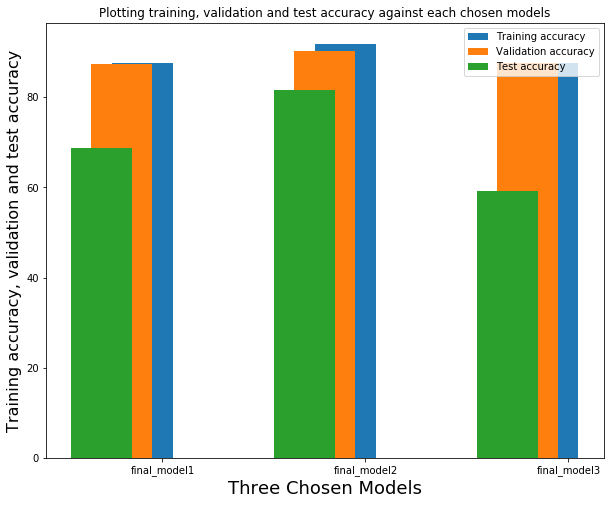

In [347]:
X_axis = np.arange(len(models))
plt.rcParams["figure.figsize"] = [10,8]
plt.bar(X_axis-0.1, training_accuracy, 0.3, label = 'Training accuracy')

plt.bar(X_axis-0.2, validation_accuracy, 0.3, label = 'Validation accuracy')

plt.bar(X_axis-0.3, test_accuracy, 0.3, label = 'Test accuracy')


plt.xticks(X_axis,models)
plt.xlabel("Three Chosen Models",fontsize=18)
plt.ylabel("Training accuracy, validation and test accuracy",fontsize=16)
plt.title('Plotting training, validation and test accuracy against each chosen models')
plt.legend()



plt.show()

**2.3b** Interesting Observations.

1. The test accuracy of the model2 with 2 Convolution layers and 2 Fully connected layers is more than the other two models

2. The test accuraccy of the model1 with only 2 fully connected layers is quite good.

3. The model2 with 2 Convolution layers and 2 Fully connected layers is giving a better performance in terms of training, validation and test accuracy than the other two models

## References:

1. Module Lecture Notes
2. Module Lab sheets
3. Wood, T. (2019). Convolutional Neural Networks. [online] DeepAI. Available at: https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network.

4. www.tutorialspoint.com. (n.d.). PyTorch - Convolutional Neural Network. [online] Available at: https://www.tutorialspoint.com/pytorch/pytorch_convolutional_neural_network.htm.

5. Sahoo, S. (2020). Creating an Autoencoder with PyTorch. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/creating-an-autoencoder-with-pytorch-a2b7e3851c2c.

